<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal-of-the-challenge" data-toc-modified-id="Goal-of-the-challenge-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal of the challenge</a></span></li><li><span><a href="#Dataset" data-toc-modified-id="Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Dataset</a></span></li><li><span><a href="#Inspecting-the-continuous-variables" data-toc-modified-id="Inspecting-the-continuous-variables-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Inspecting the continuous variables</a></span><ul class="toc-item"><li><span><a href="#Correlation-matrix" data-toc-modified-id="Correlation-matrix-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Correlation matrix</a></span></li></ul></li><li><span><a href="#Navigating-categorical-variable" data-toc-modified-id="Navigating-categorical-variable-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Navigating categorical variable</a></span></li><li><span><a href="#New-features-relevant-to-the-research-question" data-toc-modified-id="New-features-relevant-to-the-research-question-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>New features relevant to the research question</a></span><ul class="toc-item"><li><span><a href="#Interaction-between-year-built-and-whether-it-has-been-remodeled" data-toc-modified-id="Interaction-between-year-built-and-whether-it-has-been-remodeled-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Interaction between year built and whether it has been remodeled</a></span></li><li><span><a href="#The-proportion-of-living-area" data-toc-modified-id="The-proportion-of-living-area-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>The proportion of living area</a></span></li><li><span><a href="#Quality-&amp;-Condition" data-toc-modified-id="Quality-&amp;-Condition-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Quality &amp; Condition</a></span></li><li><span><a href="#PCA" data-toc-modified-id="PCA-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>PCA</a></span></li></ul></li><li><span><a href="#Selecting-features" data-toc-modified-id="Selecting-features-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Selecting features</a></span></li></ul></div>

# Goal of the challenge
Using a dataset of your choice, select an outcome variable and then pick four or five other variables (one to two categorical, three to four continuous) to act as the basis for features. Explore the variables using the univariate and bivariate methods you've learned so far.

Next, based on what you learned via your data exploration, create ten new features. Explain the reasoning behind each one.

Finally, use filtering methods to select the five best features and justify your choices.




# Dataset

The dataset is taken from Kaggle competition -- House Prices: Advanced Regression Techniques.

The outcome is the sale price for the property.

The variables chosen for this challenge include:

__LotArea:__ Lot size in square feet

__LotShape:__ General shape of property

__OverallQual:__ Overall material and finish quality

__OverallCond:__ Overall condition rating

__YearBuilt:__ Original construction date

__YearRemodAdd:__ Remodel date

__GrLivArea:__ Above grade (ground) living area square feet

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
% matplotlib inline

sns.set_style('white')

df = pd.read_csv('train.csv')

#Make a subtable for analysis
df1 = df.loc[:, ['LotArea', 'LotShape', 'OverallQual', 'OverallCond', 
                 'YearBuilt', 'YearRemodAdd', 'GrLivArea', 
                 'SalePrice']]

#Check how many null values we have for each column
df1.isnull().sum()

#There are not a lot of missing values. We can drop them.
df1 = df1.dropna()

#Check to see what the data looks like
print(df1.head(10))

   LotArea LotShape  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0     8450      Reg            7            5       2003          2003   
1     9600      Reg            6            8       1976          1976   
2    11250      IR1            7            5       2001          2002   
3     9550      IR1            7            5       1915          1970   
4    14260      IR1            8            5       2000          2000   
5    14115      IR1            5            5       1993          1995   
6    10084      Reg            8            5       2004          2005   
7    10382      IR1            7            6       1973          1973   
8     6120      Reg            7            5       1931          1950   
9     7420      Reg            5            6       1939          1950   

   GrLivArea  SalePrice  
0       1710     208500  
1       1262     181500  
2       1786     223500  
3       1717     140000  
4       2198     250000  
5       1362     143000  
6  

# Inspecting the continuous variables

We can do a pair grid first to explore all the continuous variables.

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


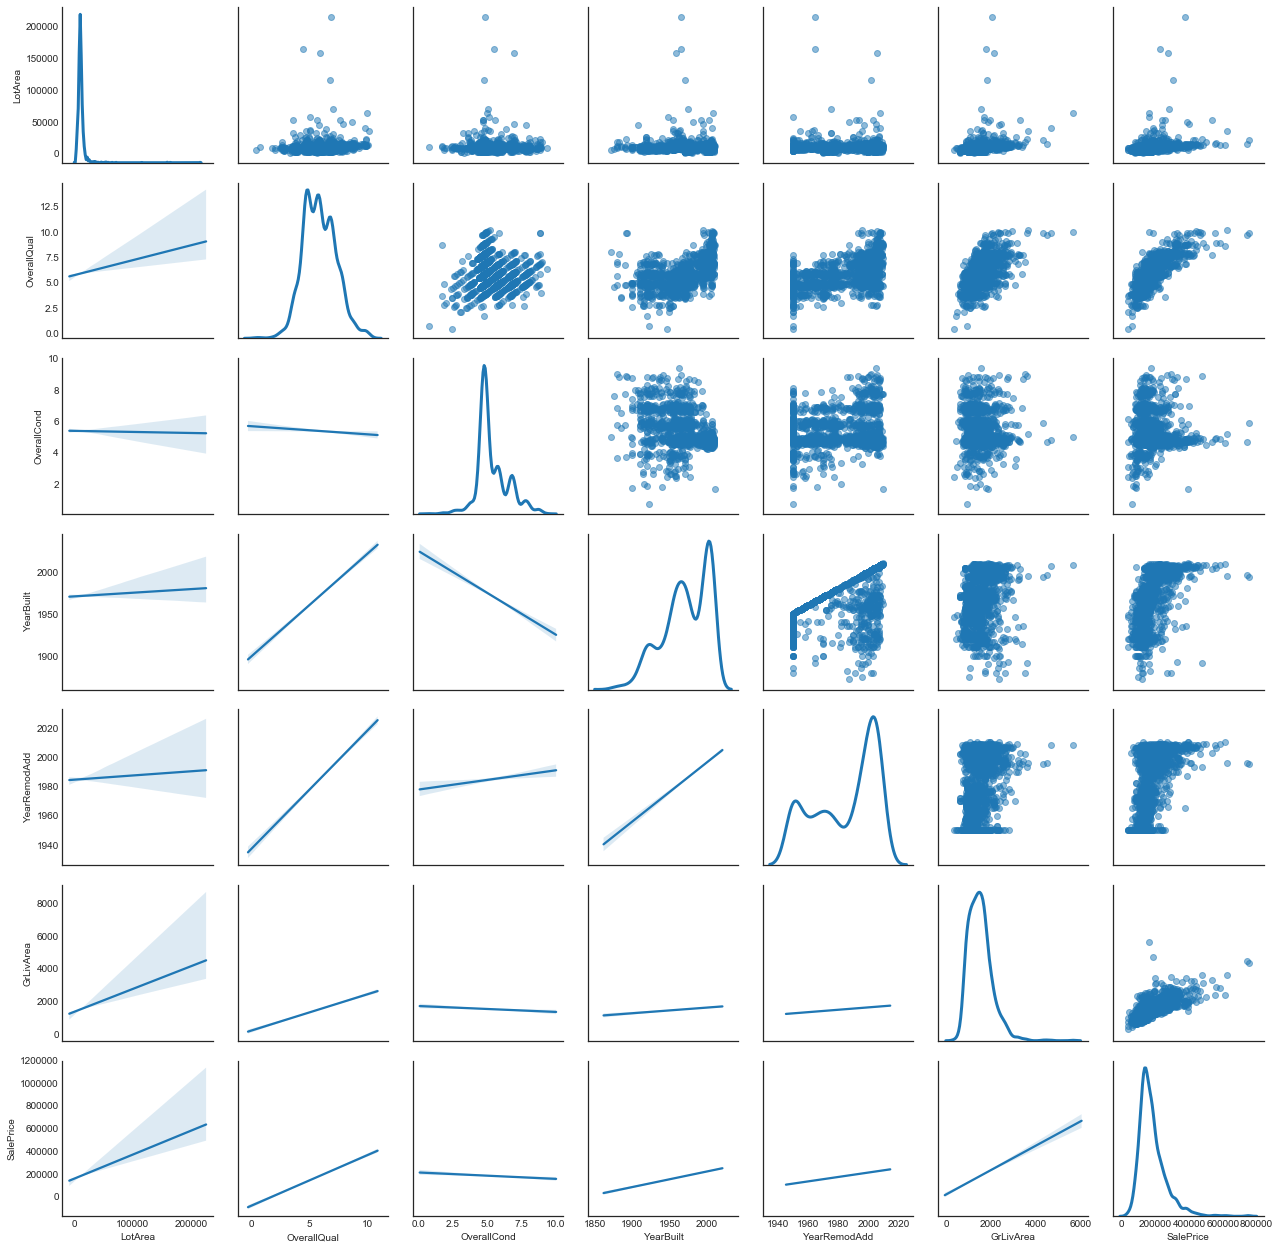

In [2]:
#Make some random noise for the interval variables
df_jittered = df1
jitter = np.random.normal(-.2, .2, len(df_jittered))

df_jittered['OverallQual'] = df_jittered['OverallQual'] + jitter
df_jittered['OverallCond'] = df_jittered['OverallCond'] + jitter

#Make a scatterplot matrix
g = sns.PairGrid(df_jittered, diag_sharey=False)
g.map_upper(plt.scatter, alpha=.5)
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
g.map_diag(sns.kdeplot, lw=3)
plt.show()

We can see that the distributions of lot area, year built, year remodeled, living area and sale price are not really normal. So let's transform them, and add those into the new features.

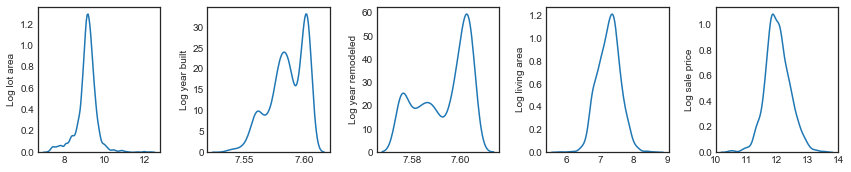

   log_lot_area  log_year_built  log_year_remod  log_living_area  \
0      9.041922        7.602401        7.602401         7.444249   
1      9.169518        7.588830        7.588830         7.140453   
2      9.328123        7.601402        7.601902         7.487734   
3      9.164296        7.557473        7.585789         7.448334   
4      9.565214        7.600902        7.600902         7.695303   

   log_sale_price  
0       12.247694  
1       12.109011  
2       12.317167  
3       11.849398  
4       12.429216  


In [3]:
#Create a new table with transformed data.
df2 = df1.loc[:, ['OverallQual','OverallCond']]

#Dealing with non-normality.
df2['log_lot_area'] = np.log(df1['LotArea'])

df2['log_year_built'] = np.log(df1['YearBuilt'])

df2['log_year_remod'] = np.log(df1['YearRemodAdd'])

df2['log_living_area'] = np.log(df1['GrLivArea'])

df2['log_sale_price'] = np.log(df1['SalePrice'])

plt.figure(figsize = (12, 2.5))
plt.subplot(151)
sns.kdeplot(df2['log_lot_area'], legend=False)
plt.ylabel('Log lot area')
plt.subplot(152)
sns.kdeplot(df2['log_year_built'], legend=False)
plt.ylabel('Log year built')
plt.subplot(153)
sns.kdeplot(df2['log_year_remod'], legend=False)
plt.ylabel('Log year remodeled')
plt.subplot(154)
sns.kdeplot(df2['log_living_area'], legend=False)
plt.ylabel('Log living area')
plt.subplot(155)
sns.kdeplot(df2['log_sale_price'], legend=False)
plt.ylabel('Log sale price')
plt.tight_layout()
plt.show()

#Also create another table to store the new features. Then print them out to check
features = df2.drop(columns=['OverallQual','OverallCond'])
print(features.head())

## Correlation matrix


Although the year built and year remodeled still looked funky after transformation, but it's good enough for this case. We can now compare the correlation matrix of the transformed data with the old data.

In [4]:
#Correlation matrix of the original data.
corr_ori = df1.corr()
print('Correlation matrix of the original data:\n', corr_ori, '\n')

#Correlation matrix of the transformed log data.
corr_log = df2.corr()
print('Correlation matrix of the log transformed data:\n', corr_log)

Correlation matrix of the original data:
                LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
LotArea       1.000000     0.104489    -0.005920   0.014228      0.013788   
OverallQual   0.104489     1.000000    -0.063565   0.563590      0.545240   
OverallCond  -0.005920    -0.063565     1.000000  -0.373391      0.072183   
YearBuilt     0.014228     0.563590    -0.373391   1.000000      0.592855   
YearRemodAdd  0.013788     0.545240     0.072183   0.592855      1.000000   
GrLivArea     0.263116     0.587734    -0.077826   0.199010      0.287389   
SalePrice     0.263843     0.780394    -0.080258   0.522897      0.507101   

              GrLivArea  SalePrice  
LotArea        0.263116   0.263843  
OverallQual    0.587734   0.780394  
OverallCond   -0.077826  -0.080258  
YearBuilt      0.199010   0.522897  
YearRemodAdd   0.287389   0.507101  
GrLivArea      1.000000   0.708624  
SalePrice      0.708624   1.000000   

Correlation matrix of the log transformed d

In general, the correlation coefficiency improved with the log transformed data.

To better visualize it, we can draw a heat map of the correlation matrix.

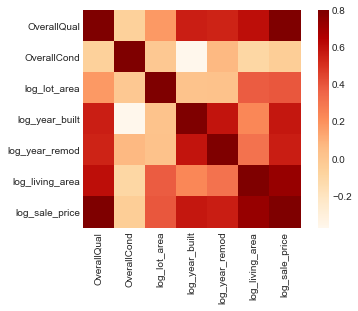

In [5]:
#Draw a heatmap of the correlation matrix of the log transformed data.
sns.heatmap(corr_log, vmax=.8, square=True, cmap='OrRd')
plt.show()

# Navigating categorical variable

In the original data, we have one categorical variable, which is whether the shape of the property is regular or not. Let's take a look.

In [6]:
#Navigating categorical variables
print('Shape of the original data:\n', df1['LotShape'].value_counts(), '\n')

#Consider all three irregular shape categories as irregular
df1['regular'] = np.where(df1['LotShape']=='Reg', 'Regular', 'Irregular')
print('After considering all three irregular shape categoris as irregular, the data looks like:\n', df1.head())

#Add the regularity of the shage of the house as a new feature.
features['regular'] = np.where(df1['regular']=='Regular', 1, 0)
df2['regular'] = features['regular']

Shape of the original data:
 Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64 

After considering all three irregular shape categoris as irregular, the data looks like:
    LotArea LotShape  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0     8450      Reg     6.670049     4.670049       2003          2003   
1     9600      Reg     5.990587     7.990587       1976          1976   
2    11250      IR1     6.708737     4.708737       2001          2002   
3     9550      IR1     6.750006     4.750006       1915          1970   
4    14260      IR1     7.688862     4.688862       2000          2000   

   GrLivArea  SalePrice    regular  
0       1710     208500    Regular  
1       1262     181500    Regular  
2       1786     223500  Irregular  
3       1717     140000  Irregular  
4       2198     250000  Irregular  


Now we can check whether regular shaped houses are different from irregular shaped houses on all the parameters that we care about.

D:\Anaconda\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


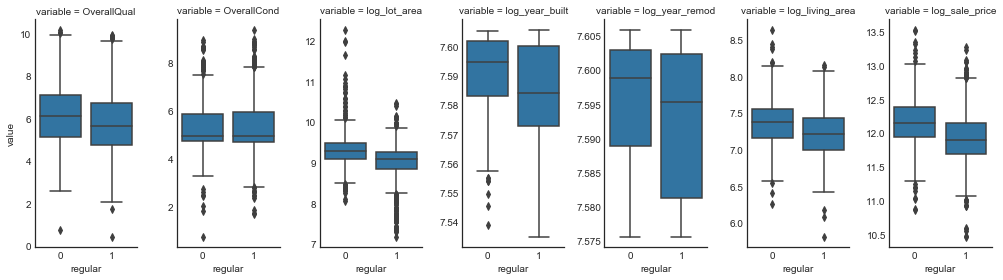

OverallQual
Ttest_indResult(statistic=-7.921758080755558, pvalue=4.610354047499456e-15)


OverallCond
Ttest_indResult(statistic=0.4894998519243402, pvalue=0.6245614942731339)


log_lot_area
Ttest_indResult(statistic=-12.79072071221749, pvalue=1.3970398312140173e-35)


log_year_built
Ttest_indResult(statistic=-9.216864001016356, pvalue=1.0356929350167916e-19)


log_year_remod
Ttest_indResult(statistic=-6.419912170980553, pvalue=1.840004771421281e-10)


log_living_area
Ttest_indResult(statistic=-7.414068574759084, pvalue=2.0680012243704886e-13)


log_sale_price
Ttest_indResult(statistic=-11.554604691573868, pvalue=1.3042780307741224e-29)




In [7]:
#Melt the dataframe.
df_box = df2
df_box = pd.melt(df_box, id_vars=['regular'])

#Draw a FacetGrid of boxplots.
g = sns.FacetGrid(df_box, col="variable", size=4, aspect=.5, sharey=False)
g = g.map(sns.boxplot, "regular", "value")
plt.show()

#T-test of all the variables
for col in df2.drop(columns = ['regular']).columns:
    print(col)
    print(stats.ttest_ind(
        df2[df2['regular'] == 1][col].dropna(),
        df2[df2['regular'] == 0][col].dropna()
    ))
    print('\n')

Except overall condition, all other variables are significantly different between regular and irregular shaped properties.

# New features relevant to the research question

Now we can explore if we can come up with some new features based on the orginal data.

## Interaction between year built and whether it has been remodeled

First is whether the house has been remodeled. If the year remodeled is the same as the year built, it means that the property has not been modeled.

It is possible that if a house is remodeled, even if it was built in old times, it could still sell at a high price.

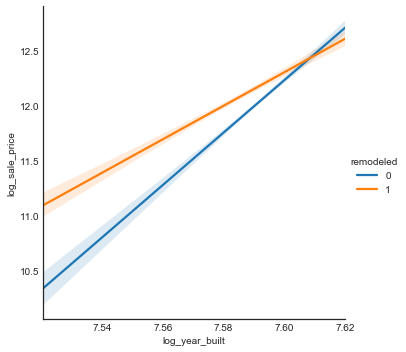

In [8]:
#Another feature that may be interesting is whether the house has been remodeled.
#If the year remodeled is the same as the year built, it means that the property
#has not been modeled.
df2['remodeled'] = np.where(df2['log_year_remod'] - df2['log_year_built'] !=0, 1, 0)

#Add remodeled or not in as a new feature
features['remodeled'] = df2['remodeled']

#Check the interaction between year built and whether it's remodeled.
sns.lmplot('log_year_built', 'log_sale_price', hue='remodeled', data=df2, scatter=False)
plt.show()

#Add the interaction between year built and remodeled or not in as a new feature.
features['YearBuilt_remodel'] = df2['log_year_remod'] * df2['remodeled']

From the plot, we can see that there is indeed an interaction between the year the property was built and whether it has been remodeled on affecting the sale price. If there hasn't been any remodeling, the year built was more correlated with the sale price.

## The proportion of living area

Another interesting feature is the proportion of above ground living area and non-living area in the whole lot's area.

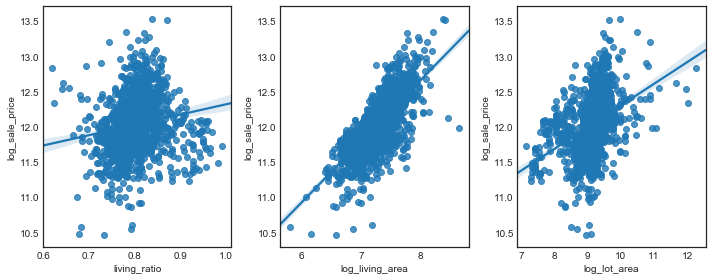

In [9]:
#Another interesting feature is the proportion of above ground living area
#and non-living area in the whole lot's area.
df2['living_ratio'] = df2['log_living_area'] / df2['log_lot_area']

#Add it in as a new feature.
features['living_ratio'] = df2['living_ratio']

#Check its correlation with the original variables and the sale price
df_area = df2.loc[:, ['living_ratio', 'log_living_area', 'log_lot_area', 'log_sale_price']]
corr_area = df_area.corr()
#Draw scatter plot to visualize
plt.figure(figsize=(10, 4))
plt.subplot(131)
sns.regplot('living_ratio', 'log_sale_price', data=df_area)

plt.subplot(132)
sns.regplot('log_living_area', 'log_sale_price', data=df_area)

plt.subplot(133)
sns.regplot('log_lot_area', 'log_sale_price', data=df_area)
plt.tight_layout()
plt.show()

It looks like the proportion of the living area actually doesn't correlate with the sale price as well as the original living area and lot area values. So it's a lousy feature.

## Quality & Condition

From the analyses above, we can see that overall condition doesn't really correlate with the sale price that much. However, combining it with quality may change things.

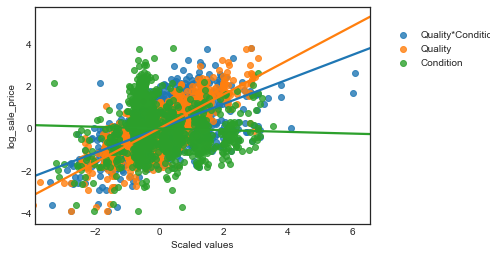

In [10]:
#Although condition itself doesn't correlate with the sale price that much,
#combining it with quality may change things
df2['qual_cond'] = df2['OverallQual'] * df2['OverallCond']
features['qual_cond'] = df2['qual_cond']

#Check the new feature's correlation with price
df_qual_cond = df2.loc[:, ['qual_cond', 'OverallQual', 'OverallCond', 'log_sale_price']]
corr_qual_cond = df_qual_cond.corr()

#Scaling the data to plot them together and visualize their correlation
#with the sale price.
names=df_qual_cond.columns
df_scaled = pd.DataFrame(preprocessing.scale(df_qual_cond), columns=names)

fig = plt.figure()
sns.regplot('qual_cond', 'log_sale_price', data=df_scaled, label='Quality*Condition', ci=None)
sns.regplot('OverallQual', 'log_sale_price', data=df_scaled, label='Quality', ci=None)
sns.regplot('OverallCond', 'log_sale_price', data=df_scaled, label='Condition', ci=None)
fig.legend(bbox_to_anchor=(0.9, 0.8), loc=2, borderaxespad=0.)
plt.xlabel('Scaled values')
plt.show()

The combined feature is much better than condition by itself, but still worse than quality. So maybe we will not use it, but just stick with quality.


## PCA

Last but not least, we can do a PCA on the log transformed values to reduce the dimension of the original data, and use a new feature to represent them.

In [11]:
#Select the variables that has a correlation coefficient between 0.2 and 0.8 with the sale price to perform PCA.
pca_list = corr_log.index[(0.2 < corr_log['log_sale_price']) &
                         (corr_log['log_sale_price'] < 0.8)].tolist()

#Check to see what these variables are.
print('Variables selected to perform PCA:\n', pca_list, '\n')

#Make a new dataframe to perform PCA, and then preprocess all the data.
df_pca = df2.loc[:, pca_list]
X = StandardScaler().fit_transform(df_pca)

#PCA
pca = PCA(n_components=4)
Y = pca.fit_transform(X)

#See how well the components explain the variance
print('The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    pca.explained_variance_ratio_, '\n')

Variables selected to perform PCA:
 ['log_lot_area', 'log_year_built', 'log_year_remod', 'log_living_area'] 

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.45913039 0.30140831 0.13981332 0.09964798] 



Looks like the first two components explain more than 75% of the variance, so we will add these two components as new features.

In [12]:
#Create a dataframe of the PCA results
df_components = pd.DataFrame(Y)

#Add the first two components to features table.
features['PCA_component_1'] = df_components[0]
features['PCA_component_2'] = df_components[1]

#Check what new features we have now.
print(features.head())

   log_lot_area  log_year_built  log_year_remod  log_living_area  \
0      9.041922        7.602401        7.602401         7.444249   
1      9.169518        7.588830        7.588830         7.140453   
2      9.328123        7.601402        7.601902         7.487734   
3      9.164296        7.557473        7.585789         7.448334   
4      9.565214        7.600902        7.600902         7.695303   

   log_sale_price  regular  remodeled  YearBuilt_remodel  living_ratio  \
0       12.247694        1          0           0.000000      0.823304   
1       12.109011        1          0           0.000000      0.778716   
2       12.317167        0          1           7.601902      0.802705   
3       11.849398        0          1           7.585789      0.812756   
4       12.429216        0          0           0.000000      0.804509   

   qual_cond  PCA_component_1  PCA_component_2  
0  31.149458         1.345998        -0.561736  
1  47.868303        -0.321701        -0.004777  

# Selecting features

Cool. So now we have 11 new features. Let's add the two original untransformed variable - overall quality and overall condition - and see how well they correlate with the outcome again.

In [13]:
#Add the two untransformed variables to our final features table.
features[['overall_qual', 'overall_cond']] = df1[['OverallQual', 'OverallCond']]

#Make a final correlation matrix.
corr_final = features.corr()

#Print correlation coefficient of each variable with the log sale price.
print(corr_final['log_sale_price'].sort_values(ascending=False))

log_sale_price       1.000000
PCA_component_1      0.842597
overall_qual         0.806083
log_living_area      0.730255
log_year_built       0.584442
qual_cond            0.579381
log_year_remod       0.565590
log_lot_area         0.399918
PCA_component_2      0.184353
living_ratio         0.173638
overall_cond        -0.040320
YearBuilt_remodel   -0.072939
remodeled           -0.073761
regular             -0.289635
Name: log_sale_price, dtype: float64


Based on these new correlation coefficients and some reasoning, and using the filtering method, we will choose the PCA component 1, overall quality, log living area, log_year_built, and log_year_remod as the top five features.